In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.style as style
style.use('fivethirtyeight')
# Treemap Ploting
import squarify
# Matplotlib and Seaborn imports
import matplotlib
 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Analyzing Finalized Refugee Cases, Canada 2013-17**
#### In this project, I will do a short analysis to try and answer the following questions about refugee claims in Canada from 2013 to 2017.
1.  Has Canda been getting more or fewer refugees?  What is the total number of cases from 2013 to 2017? And what is the total per outcome ?
2.  Has Canda been accepting more or fewer refugees?
3.  What are the top ten countries that have the most refugees from 2013 to 2017  total and per year?
5. Has the rejection rate been increasing or decreasing?
7.  Draw an interactive world map showing countries and total number of finalized cases from 2013 to 2017..

The dataset conssists of six columns:
1. Year :  Year in which the case was finalized.
2. Quarter : Quarter in which case was finalized.
3. Region : The regional office to which area the case has been assigned.
4. Country of Persecution : Country of alleged prersecution as listed in the claim.
5. Outcome: The general outcome of the finalized case (positive, negative or other). Positive:  
                        * Positive: The  claimant is either a Convention refugee or a person in need of protection.
                        * Negative: The claimant is not a Convention refugee or a person in need of protection. 
                        * Other: A non-merit or administrative decision to close the case was made. Examples include withdrawals, abandonments, deceased claimant, etc.
6. Count : The number of cases.

This is an open data that is availble at the Government of Canada website
https://open.canada.ca/data/en/dataset/6e47f705-71ed-41f0-8fd5-d1a8508a3b63


In [2]:
# Reading the dataset to pandas dataframe
url = 'https://open.canada.ca/data/dataset/6e47f705-71ed-41f0-8fd5-d1a8508a3b63/resource/42855a05-e0f8-42e6-b260-dd18708c4b30/download/rpd-open-data-2018-june.csv'
ref_data = pd.read_csv(url)

In [3]:
# A quick exploration of the data 
print(ref_data.shape)
ref_data.head()


(11902, 6)


,Year,Quarter,Region,Country of Persecution,Outcome,Count
0,2013,Qtr1,Central,Afghanistan,Negative,5
1,2013,Qtr1,Central,Afghanistan,Other,10
2,2013,Qtr1,Central,Afghanistan,Positive,26
3,2013,Qtr1,Central,Albania,Negative,25
4,2013,Qtr1,Central,Albania,Other,5


We have 10733 rows and 6 columns in this dataset. These row represent the outcome for each country from 2013 to 2018.

In [4]:
# Last 5 rows of the data
ref_data.tail()

,Year,Quarter,Region,Country of Persecution,Outcome,Count
11897,2018,Qtr2,Western,Yemen,Negative,3
11898,2018,Qtr2,Western,Yemen,Positive,21
11899,2018,Qtr2,Western,Zimbabwe,Negative,1
11900,2018,Qtr2,Western,Zimbabwe,Other,1
11901,2018,Qtr2,Western,Zimbabwe,Positive,1


In [5]:
ref_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 6 columns):
Year                      11902 non-null int64
Quarter                   11902 non-null object
Region                    11902 non-null object
Country of Persecution    11902 non-null object
Outcome                   11902 non-null object
Count                     11902 non-null int64
dtypes: int64(2), object(4)
memory usage: 558.0+ KB


### The dataset has incomplete data for 2018, and some rows where the country is blank. I am goin to remove those rows to get a better analysis for each year.

In [6]:
ref_data = ref_data[ref_data['Year'] != 2018]
# Remove rows with no country
ref_data = ref_data[ref_data["Country of Persecution"] !='(blank)']
ref_data.tail()

,Year,Quarter,Region,Country of Persecution,Outcome,Count
10728,2017,Qtr4,Western,Venezuela,Positive,10
10729,2017,Qtr4,Western,Yemen,Negative,2
10730,2017,Qtr4,Western,Yemen,Other,1
10731,2017,Qtr4,Western,Yemen,Positive,24
10732,2017,Qtr4,Western,Zimbabwe,Positive,5


### Let's see the total number of finalized cases per year


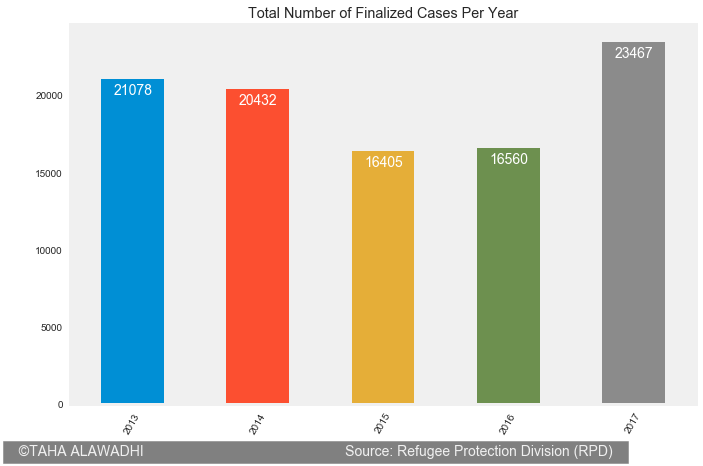

In [7]:
# Grouping the dataset by year and total count
total_cases_per_year = ref_data.groupby("Year")["Count"].sum()

# Creating a graph to plot the data
graph = total_cases_per_year.plot.bar(figsize=(10,7), title = 'Total Number of Finalized Cases Per Year', rot = 60 )
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)
plt.grid(False)
graph.text(x = -1, y = -3350, s = '   ©TAHA ALAWADHI                                                    Source: Refugee Protection Division (RPD)   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+.10, i.get_height()-1000, \
            str(round((i.get_height()), 2)), fontsize=14,
                color='white')    

plt.show()

### It seems that in 2017 the total number of finalized cases if more than previous years which could mean that there is an increase in refugees to Canada.
### Let's check the total number of cases by outcome from 2013-2017

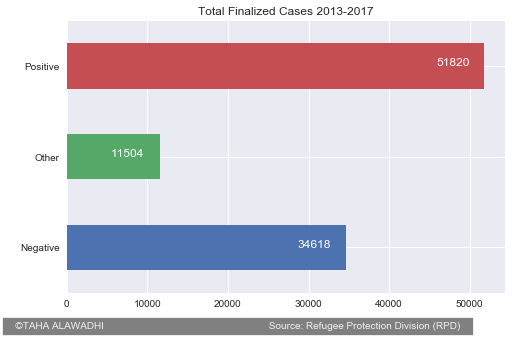

In [8]:
# Group the dataset by the outcome and total count
total_by_outcome_per_year = ref_data.groupby("Outcome")["Count"].sum()

# Changing raph style 
sns.set()

# Creating a graph to plot the data
graph = total_by_outcome_per_year.plot.barh(figsize=(7,5), title = 'Total Finalized Cases 2013-2017' )
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)
#plt.grid(False)
graph.text(x = -7400, y = -.9, s = '   ©TAHA ALAWADHI                                                            Source: Refugee Protection Division (RPD)   ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# set individual bar lables using above list
for i in graph.patches:
    # get_width pulls left or right; get_y pushes up or down
    graph.text(i.get_width()-6000, i.get_y()+.25, \
            str(round((i.get_width()), 2)), fontsize=12,
color='white')
    
 

plt.show()


### What about totaly by outcome per year?

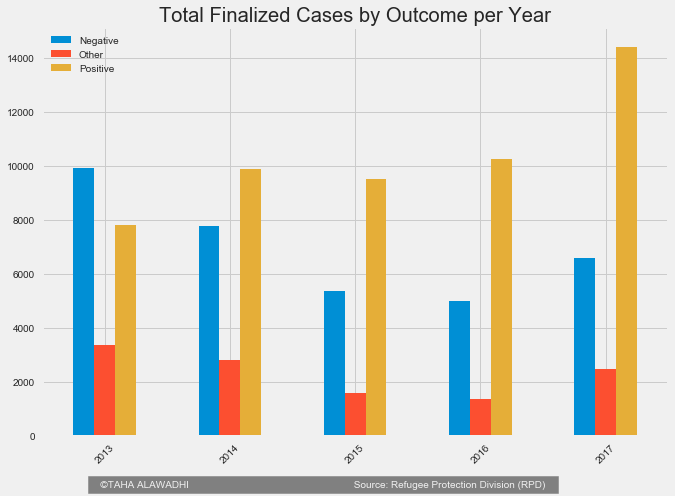

In [9]:
# Grouping the data by year and outcome 
total_outcome_per_year = ref_data.pivot_table(index='Year',columns='Outcome',aggfunc=sum)

# Changing style
style.use('fivethirtyeight')

#creating the graph
graph = total_outcome_per_year.plot.bar(figsize=(10,7), title = 'Total Finalized Cases by Outcome per Year', rot = 45)
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)
#plt.grid(False)
graph.legend(['Negative','Other','Positive'], loc = 'best')
graph.text(x = -.1, y = -1900, s = '   ©TAHA ALAWADHI                                                            Source: Refugee Protection Division (RPD)   ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')
plt.show()

### Plotting line chart for total finalized cases by outcome per year

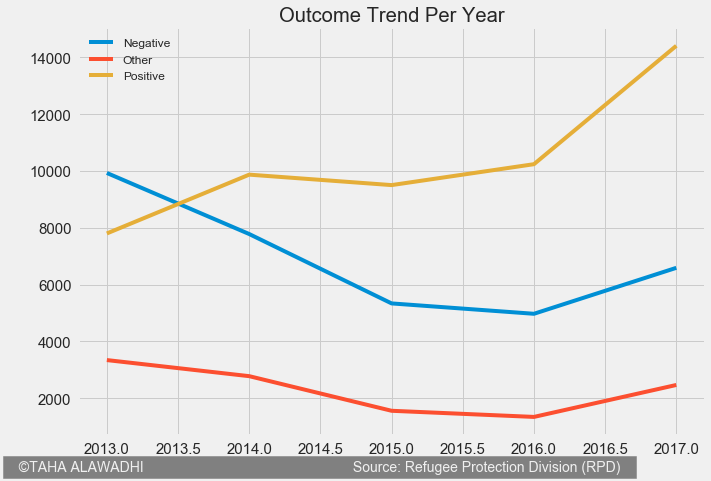

In [10]:
style.use('fivethirtyeight')
graph = total_outcome_per_year.plot( figsize=(10,7), title = "Outcome Trend Per Year")
graph.tick_params(axis = 'both', which = 'major', labelsize = 15)
graph.xaxis.label.set_visible(False)
graph.legend(['Negative','Other','Positive'], loc = 'best', prop={'size': 12})
graph.text(x = 2012.3, y =-550,
    s = '   ©TAHA ALAWADHI                                                      Source: Refugee Protection Division (RPD)   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.show()

### It seems that Canada has been accepting more than rejecting refugee cases except for 2013, and the number increased drematiclay  from 2015. This could be due to the political change in 2015 where the Liberals took control or a change on the country of alleged presecution.

### Let's what are the top ten countries that has the most refugees from 2013 to 2017

In [11]:
# Creatin a list for the countries and total number of cases per country
countries_total = []

# Countries list
countries = list(ref_data['Country of Persecution'].unique())

# Looping through he dataset and add countries with its total to the list
for country in countries:
    country_positive = ref_data[(ref_data['Country of Persecution'] == country) & (ref_data['Outcome'] == 'Positive')]['Count'].sum()
    country_negative = ref_data[(ref_data['Country of Persecution'] == country) & (ref_data['Outcome'] == 'Negative')]['Count'].sum()
    country_other = ref_data[(ref_data['Country of Persecution'] == country) & (ref_data['Outcome'] == 'Other')]['Count'].sum()
    total = country_positive + country_negative + country_other
    countries_total.append([country, country_positive, country_negative, country_other, total ])

# Converting the list to a dataframe, sorting by total and assinging the top ten countries to another dataframe
countries_total_df = pd.DataFrame(countries_total, columns=['Country','Positive', 'Negative', 'Other', 'Total'])
top_ten_countries = countries_total_df.sort_values(by='Total', ascending=False, inplace=True)
top_ten_countries = countries_total_df.drop('Total', axis = 1)[:10]


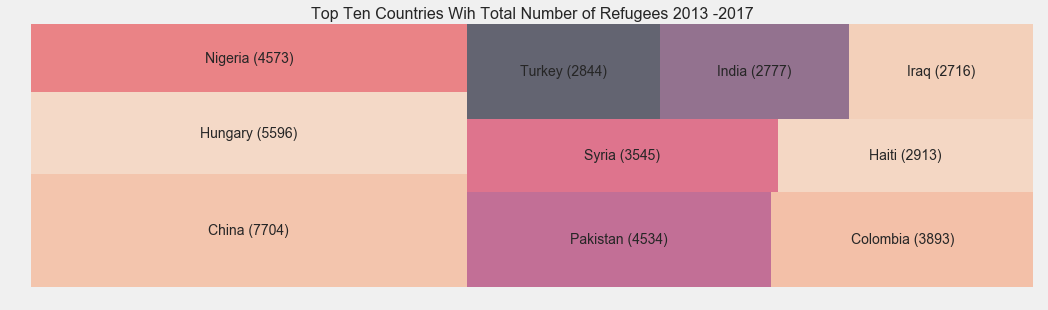

In [12]:
# New dataframe, top ten countries and the total
top_ten_countries_total = top_ten_countries.copy() 
top_ten_countries_total['Total'] = top_ten_countries['Positive'] + top_ten_countries['Negative'] + top_ten_countries['Other']

#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(top_ten_countries_total['Total']), vmax=max(top_ten_countries_total['Total']))

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

# Creating label
label = top_ten_countries['Country'] + " (" + top_ten_countries_total['Total'].astype("str")+ ")"

#Use squarify to plot our data, label it and add colours. 
squarify.plot(label = label,sizes = top_ten_countries_total['Total'],  alpha = .6)
plt.title("Top Ten Countries Wih Total Number of Refugees 2013 -2017",fontsize = 16)

#Remove our axes and display the plot
plt.axis('off')
plt.show()

#### That is very interesting, Hungary one of the European Union countries is on second place. Let's check top ten countries by outcome

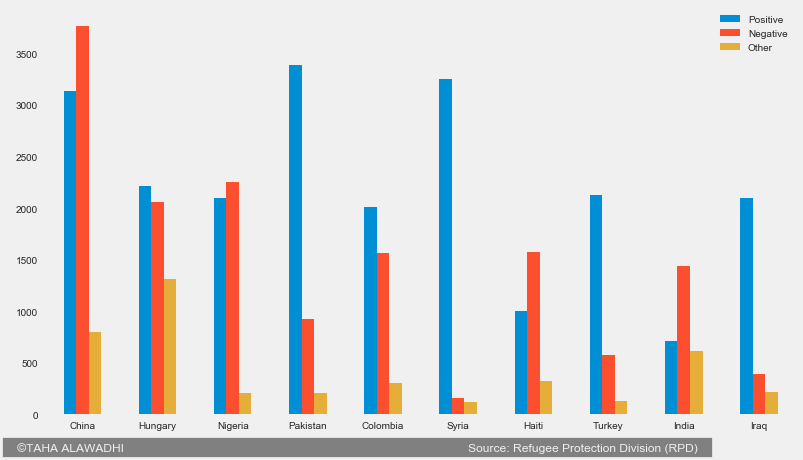

In [13]:
# Plotting the result
top_ten_countries.plot.bar(figsize=(12,7),rot=0)
#graph.xticks(top_ten_countries['Countries'])
ind = np.arange(10)
#style.use('fivethirtyeight')
sns.set()
plt.xticks(ind, top_ten_countries["Country"])
plt.grid(False)
plt.text(x = -1, y =-350,
    s = '   ©TAHA ALAWADHI                                                                                                      Source: Refugee Protection Division (RPD)   ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
plt.show()

### Although China and Hungary in the top of the list, the number of negative outcoms is very high for them, that makes sense as there is no armed conflict in these two countries. On the contrary, we see that the number of positive outcomes for Syria is very high due to the civil war there.


### Summary of Results
#### In this short analysis, we found out that number of cases decreased in 2015 and 2016 than increased in 2017, I would assume this is a result to the presidential elections outcome in the state where the new administration is not welcoming asylum seekers which makes Canada a better option for asylum seekers.
#### When we checked the total number of finalized cases, we found that Canada is accepting more the rejecting asylum seekers especial in the last three years, which means Canada is a welcoming country for refugees. I would assume this is due to the liberal government which was elected in 2015. 
#### Finally, we surprisingly found that Hungary is second on the top ten countries even though it is a European Union country with no armed conflicts. China is first, but the rejection rate for these two countries is very high. In the other hand countries like Syria and Iraq has a very high total positive outcome which make sense as the people of two countries are leaving due to the civil war and political unrest. 
